In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
from API import YouTubeAPI_utility as api
import Download_Data as dd
import Preprocess_EDA as eda
import pytz
from datetime import datetime, timedelta


dd.downloadData()
df = eda.integrate_clean_data()

us_df = df[(df['country']=='US')]
gb_df = df[(df['country']=='GB')]
ca_df = df[(df['country']=='CA')]

us_df_unique_id = us_df.drop_duplicates(subset=['video_id'], keep='first')
gb_df_unique_id = gb_df.drop_duplicates(subset=['video_id'], keep='first')

def getWeekdayTxt(date):
    
    weekday=""
    if date.isoweekday()== 1:
        weekday = "Monday"
    elif date.isoweekday()== 2:
        weekday = "Tuesday"    
    elif date.isoweekday()== 3:
        weekday = "Wednesday"
    elif date.isoweekday()== 4:
        weekday = "Thursday"
    elif date.isoweekday()== 5:
        weekday = "Friday"
    elif date.isoweekday()== 6:
        weekday = "Saturday"
    elif date.isoweekday()== 7:
        weekday = "Sunday"
    
    return weekday

def find_number(text):
    
    num = re.findall(r'[0-9]+',text)
    
    return "".join(num)

def changeTimeZone(country, time):
    timezone = pytz.timezone("UTC")
    time = timezone.localize(time)
    output_time = None 
    if country == 'US' :
        eastern_timezone = pytz.timezone("US/Pacific")
        output_time = time.astimezone(eastern_timezone)
    return output_time

#Analysis from trending date >= 2021-01-01
us_df_unique_id['trending_date'] = us_df_unique_id['trending_date'].apply(lambda x: find_number(x))
us_df_unique_id['trending_date'] = pd.to_datetime(us_df_unique_id['trending_date'], format='%Y%m%d%H%M%S')
us_df_unique_id = us_df_unique_id[(us_df_unique_id['trending_date']>='2021-01-01')]
us_df_unique_id = us_df_unique_id.sort_values(by=['trending_date'], ascending=True)
us_df_unique_id['published_weekday'] = us_df_unique_id['publishDate'].apply(lambda x: getWeekdayTxt(x))
us_df_unique_id['published_hour'] = pd.to_datetime(us_df_unique_id['publishTime'], format='%H:%M:%S').dt.strftime('%I %p')
#us_df_check = us_df_unique_id[['publishedAt','publishDate','publishTime','published_weekday','published_hour']]
#print(us_df_check.head(2))



/var/folders/jr/3jp0mr990s3cygtff_ngb3980000gn/T/ipykernel_1644/3157350286.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df_unique_id['trending_date'] = us_df_unique_id['trending_date'].apply(lambda x: find_number(x))
/var/folders/jr/3jp0mr990s3cygtff_ngb3980000gn/T/ipykernel_1644/3157350286.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df_unique_id['trending_date'] = pd.to_datetime(us_df_unique_id['trending_date'], format='%Y%m%d%H%M%S')


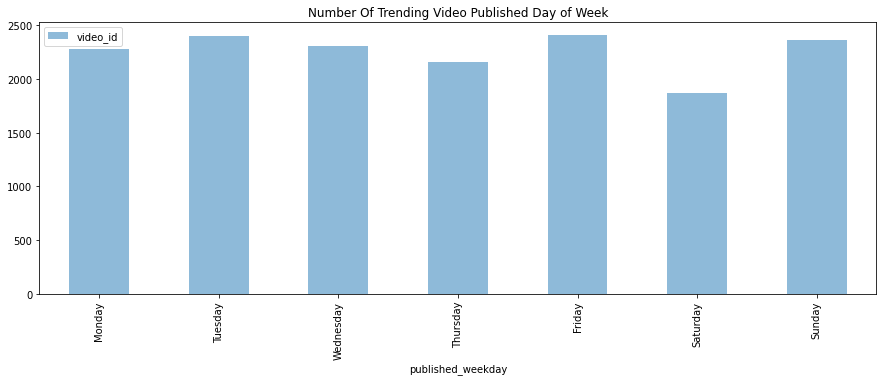

In [18]:
#publish day of week related on trending videos list
weekday_us_df =  us_df_unique_id[['video_id','published_weekday','country']].groupby(['country','published_weekday'], as_index=False).count()
weekday_us_df['published_weekday']=pd.Categorical(weekday_us_df['published_weekday'], ["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"])
weekday_us_df = weekday_us_df.sort_values('published_weekday')
weekday_us_trending_graph = weekday_us_df.plot.bar(x='published_weekday', y='video_id', figsize=(15,5), title='Number Of Trending Video Published Day of Week', alpha=0.5)    

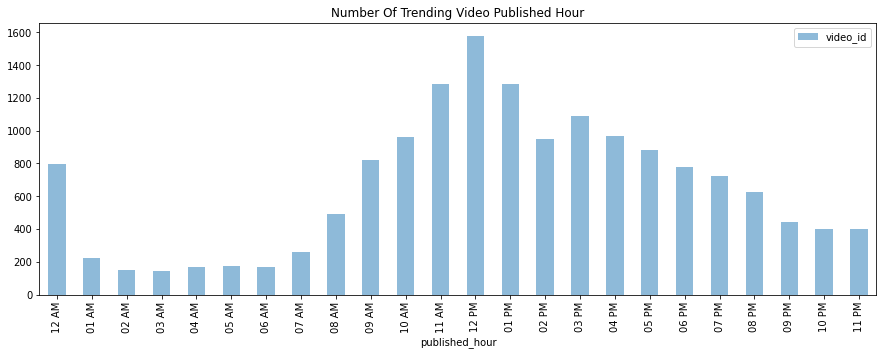

In [19]:
#publish hour  related on trending videos list
hour_us_df =  us_df_unique_id[['video_id','published_hour','country']].groupby(['country','published_hour'], as_index=False).count()
hour_us_df['published_hour']=pd.Categorical(hour_us_df['published_hour'], ["12 AM", "01 AM", "02 AM","03 AM","04 AM","05 AM","06 AM","07 AM","08 AM","09 AM","10 AM","11 AM",
                                                                              "12 PM", "01 PM", "02 PM","03 PM","04 PM","05 PM","06 PM","07 PM","08 PM","09 PM","10 PM","11 PM"])
hour_us_df = hour_us_df.sort_values('published_hour')
hour_us_trending_graph = hour_us_df.plot.bar(x='published_hour', y='video_id', figsize=(15,5), title='Number Of Trending Video Published Hour', alpha=0.5)      

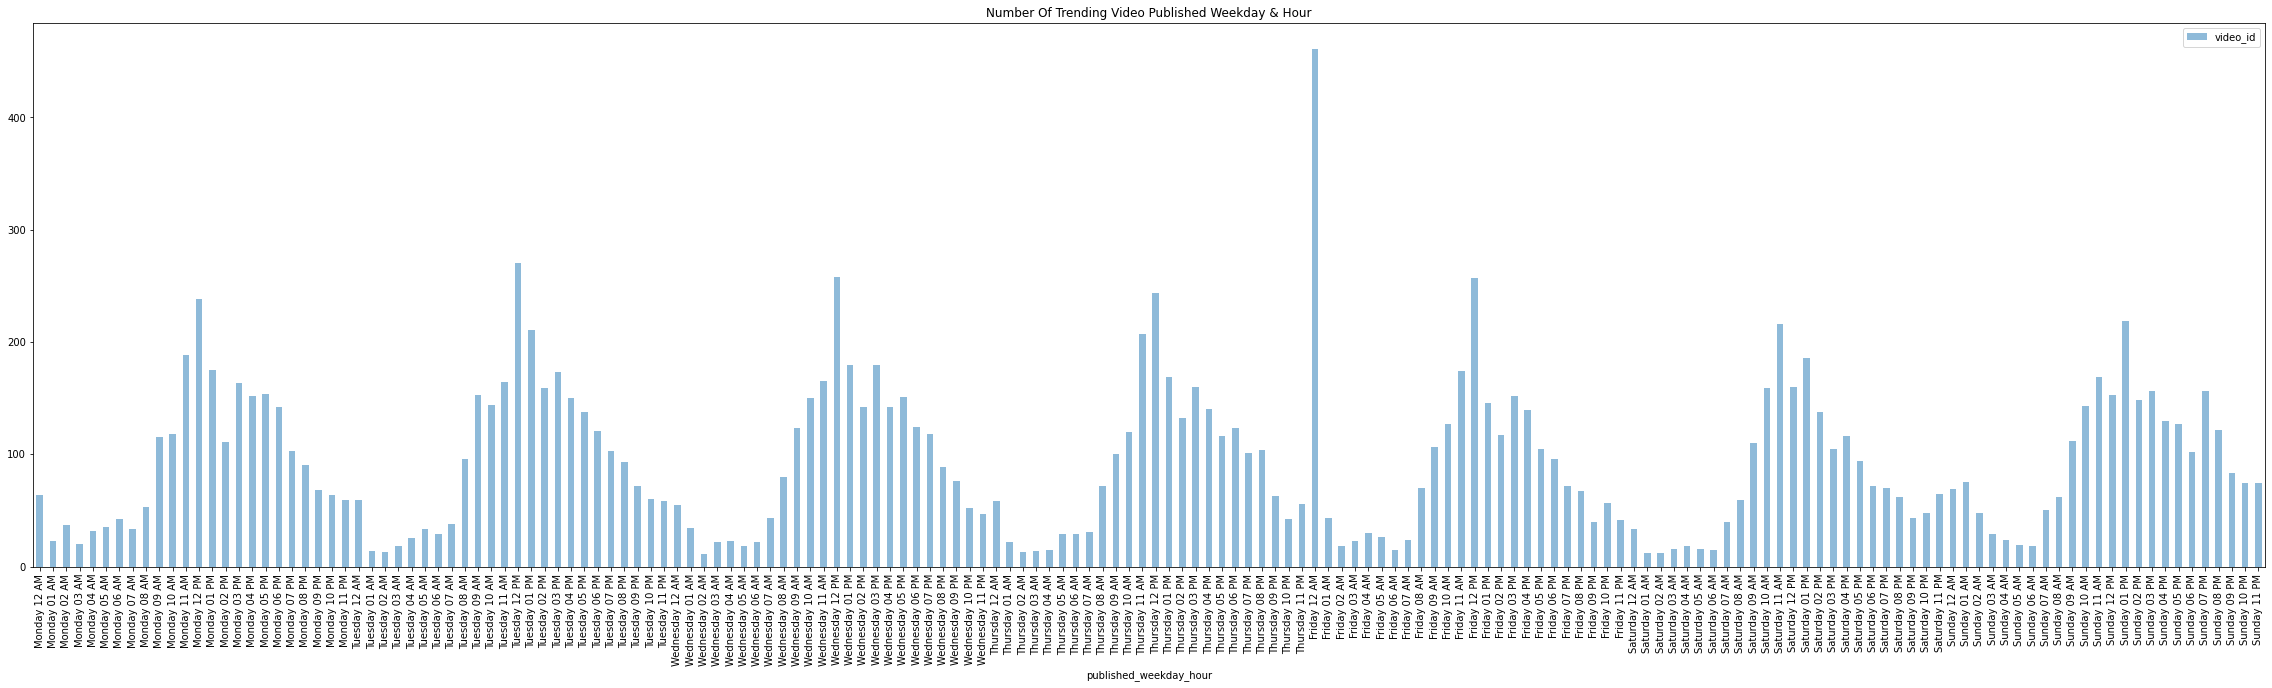

In [20]:
#publish day of week and hour related on trending videos list
weekday_hour_us_df = us_df_unique_id[['video_id','published_weekday','published_hour','country']].groupby(['country','published_weekday','published_hour'], as_index=False).count()
weekday_hour_us_df['published_weekday']=pd.Categorical(weekday_hour_us_df['published_weekday'], ["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"])
weekday_hour_us_df['published_hour']=pd.Categorical(weekday_hour_us_df['published_hour'], ["12 AM", "01 AM", "02 AM","03 AM","04 AM","05 AM","06 AM","07 AM","08 AM","09 AM","10 AM","11 AM",
                                                                                                 "12 PM", "01 PM", "02 PM","03 PM","04 PM","05 PM","06 PM","07 PM","08 PM","09 PM","10 PM","11 PM"])
weekday_hour_us_df = weekday_hour_us_df.sort_values(['published_weekday','published_hour'])
weekday_hour_us_df["published_weekday_hour"] = weekday_hour_us_df["published_weekday"].astype(str)+ " " + weekday_hour_us_df["published_hour"].astype(str)
weekday_hour_us_trending_graph = weekday_hour_us_df.plot.bar(x='published_weekday_hour', y='video_id', figsize=(40,10), title='Number Of Trending Video Published Weekday & Hour', alpha=0.5)  
weekday_hour_us_df.to_csv(r'Tableau_Workbook/data/weekday_hour_us_df.csv')

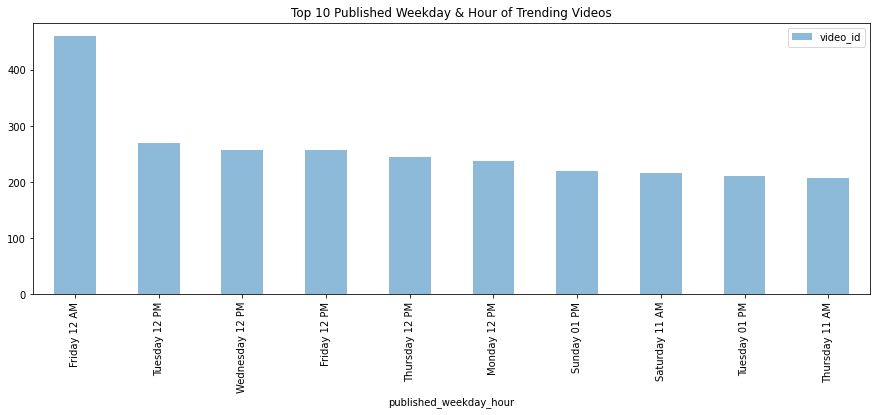

In [ ]:
#top 10 publish day of week and hour related on trending videos list
weekday_hour_us_df = weekday_hour_us_df.sort_values('video_id', ascending=False)
top_10_weekday_hour_us_df = weekday_hour_us_df.head(10)
top_10_weekday_hour_us_trending_graph = top_10_weekday_hour_us_df.plot.bar(x='published_weekday_hour', y='video_id', figsize=(15,5), title='Top 10 Published Weekday & Hour of Trending Videos', alpha=0.5)  

In [21]:
weekday_hour_us_df = weekday_hour_us_df.sort_values(['published_weekday','published_hour'])

us_df_unique_id['published_weekday']=pd.Categorical(us_df_unique_id['published_weekday'], ["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"])
us_df_unique_id['published_hour']=pd.Categorical(us_df_unique_id['published_hour'], ["12 AM", "01 AM", "02 AM","03 AM","04 AM","05 AM","06 AM","07 AM","08 AM","09 AM","10 AM","11 AM",
                                                                                                 "12 PM", "01 PM", "02 PM","03 PM","04 PM","05 PM","06 PM","07 PM","08 PM","09 PM","10 PM","11 PM"])
us_df_unique_id = us_df_unique_id.sort_values(['published_weekday','published_hour'])
us_df_unique_id["published_weekday_hour"] = us_df_unique_id["published_weekday"].astype(str)+ " " + us_df_unique_id["published_hour"].astype(str)

view_corr = us_df_unique_id['published_weekday_hour'].str.get_dummies().corrwith(us_df_unique_id['view_count']/us_df_unique_id['view_count'].max())
view_corr_df = pd.DataFrame(view_corr, columns=['view_corr'])
view_corr_df = view_corr_df.reset_index()
view_corr_df = view_corr_df.rename(columns={"index": "published_weekday_hour"})
#display(view_corr_df)


like_corr = us_df_unique_id['published_weekday_hour'].str.get_dummies().corrwith(us_df_unique_id['likes']/us_df_unique_id['likes'].max())
like_corr_df = pd.DataFrame(like_corr, columns=['like_corr'])
like_corr_df = like_corr_df.reset_index()
like_corr_df = like_corr_df.rename(columns={"index": "published_weekday_hour"})
#display(like_corr_df)


publishedAt_corr_us_df = weekday_hour_us_df.merge(view_corr_df, how = 'inner', on = ['published_weekday_hour'])
publishedAt_corr_us_df = publishedAt_corr_us_df.merge(like_corr_df, how = 'inner', on = ['published_weekday_hour'])
display(publishedAt_corr_us_df)
publishedAt_corr_us_df.to_csv(r'Tableau_Workbook/data/publishedAt_corr_us_df.csv')

,country,published_weekday,published_hour,video_id,published_weekday_hour,view_corr,like_corr
0,US,Monday,12 AM,64,Monday 12 AM,0.005953,-0.004247
1,US,Monday,01 AM,23,Monday 01 AM,0.002377,-0.004127
2,US,Monday,02 AM,37,Monday 02 AM,0.009019,0.007330
3,US,Monday,03 AM,20,Monday 03 AM,0.010036,0.016204
4,US,Monday,04 AM,32,Monday 04 AM,0.031505,0.046685
5,US,Monday,05 AM,35,Monday 05 AM,0.073497,0.071087
6,US,Monday,06 AM,42,Monday 06 AM,-0.003142,-0.002913
7,US,Monday,07 AM,33,Monday 07 AM,0.004927,-0.000238
8,US,Monday,08 AM,53,Monday 08 AM,-0.002336,0.001957
9,US,Monday,09 AM,115,Monday 09 AM,0.014174,-0.000329
